<a href="https://colab.research.google.com/github/frncsco33/Ciencia_y_Analitica_de_Datos/blob/main/Nelo_Bussines_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROWTH MARKETING CASE**

1. Definición del Problema

*En un contexto de adquisición digital, la empresa ha invertido en dos canales principales de marketing pagado: Facebook Ads y Google Ads, con el objetivo de generar registros o signups de nuevos usuarios. Paralelamente, se está evaluando la efectividad de un programa de referidos mediante un experimento A/B que compara dos incentivos: recompensas en efectivo y descuentos.

*Ejercicio 1: Paid Media Optimization
Analizar el desempeño de las campañas en Facebook y Google para:

  Determinar cómo redistribuir eficientemente la inversión entre ambos canales.
  Estimar el retorno esperado (en signups) ante una inversión adicional de $10,000 USD por canal.
  Generar recomendaciones tácticas basadas tanto en los datos como en experiencia previa en growth.

*Ejercicio 2: Referral Program Optimization
  Evaluar un experimento A/B del programa de referidos para:
  Analizar el impacto de ofrecer recompensas en efectivo versus descuentos a quienes refieren nuevos usuarios.
  Tomar una decisión con base en datos y supuestos claros sobre cuál incentivo escalar.




2. Preguntas Clave a Resolver

  *¿Qué canal entrega mayor eficiencia de adquisición (signups / inversión)?

  *¿Cómo se comporta el CPA (Costo por Adquisición) por canal?

  *¿Dónde deberíamos invertir $10,000 adicionales?

  *¿Qué acciones de mejora podemos proponer basadas en los datos?
  
  *¿Qué decisión tomar respecto al programa de referidos según el A/B test?



**Sección 1: Importación de librerías, Carga de Datos**

In [8]:
# Importar archivo
from google.colab import files
uploaded = files.upload()

Saving google.csv to google (1).csv
Saving facebook.csv to facebook (1).csv
Saving signups.csv to signups (1).csv


In [9]:
# Leer el BD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
signups = pd.read_csv('signups.csv')
facebook = pd.read_csv('facebook.csv')
google = pd.read_csv('google.csv')

In [10]:
signups

,uuid,created_at,attribution_campaign,attribution_partner_name
0,18c5dd82-53c1-44f5-a011-f9e8e0b0e488,2021-09-01T00:00:53.414-05:00,NaN,NaN
1,3daddab4-6566-4066-af15-114748f124af,2021-09-01T00:00:55.267-05:00,Omneky_AAI,Facebook
2,d4e45d7c-31c2-4a1a-8fb7-d4b0210f99b1,2021-09-01T00:00:57.03-05:00,Omneky_AAI,Facebook
3,f00e9a30-65a4-4127-a61b-ded521a133f7,2021-09-01T00:02:55.08-05:00,Omneky_AAI,Facebook
4,c5f68661-c430-4e96-a787-c01b1bdc46a0,2021-09-01T00:02:56.528-05:00,Omneky_AAI,Facebook
...,...,...,...,...
180452,03f5f078-644e-4908-879f-e232b5e8f4aa,2021-12-31T23:51:45.02-06:00,NaN,NaN
180453,6262b5ab-9d02-479a-91e3-74429bb93d89,2021-12-31T23:52:47.722-06:00,NaN,NaN
180454,5b1188a6-5c93-45aa-a224-d11472ce9656,2021-12-31T23:54:53.241-06:00,Omneky_Registrations_CDMX,Google AdWords
180455,13c106a0-9db8-4be3-9300-6b046aa6e607,2021-12-31T23:56:43.83-06:00,NaN,NaN


In [11]:
facebook

,Day,Campaign name,Ad Set Name,Ad name,Amount spent (USD),Impressions,Link clicks
0,01/09/2021,Omneky_AAI,Omneky AAI,Launch 6/14/21,3197.49,1225115.0,8386.0
1,01/09/2021,Omneky_AndroidRegistrations_Prospecting_MX,Omneky AAR,Launch 6/14/21,656.67,167917.0,949.0
2,02/09/2021,Omneky_AndroidRegistrations_Prospecting_MX,Omneky AAR,Launch 6/14/21,1371.67,309690.0,2068.0
3,02/09/2021,Omneky_AAI,Omneky AAI,Launch 6/14/21,1344.92,455660.0,4120.0
4,03/09/2021,Omneky_AAI,Omneky AAI,Launch 6/14/21,2498.64,956343.0,14017.0
...,...,...,...,...,...,...,...
552,30/12/2021,Omneky_AndroidRegistrations_Prospecting_MX,Omneky AAR,Launch 6/14/21,835.59,252203.0,1596.0
553,30/12/2021,Omneky AAI - IOS14 - Installs,Omneky AAI - IOS14,Launch10/28/2021,141.64,52824.0,352.0
554,31/12/2021,Omneky_AndroidRegistrations_Prospecting_MX,Omneky AAR,Launch 6/14/21,570.80,237617.0,1238.0
555,31/12/2021,Omneky AAI - IOS14 - Installs,Omneky AAI - IOS14,Launch10/28/2021,113.72,61217.0,418.0


In [12]:
google

,Day,Campaign,Ad group,Cost,Clicks,Impr.
0,01/09/2021,Omneky_AppInstalls_CDMX,Ad group 1,5.58,85,"7,692"
1,01/09/2021,Omneky_AppInstalls_CDMX,CrediNelo New Creative,4.84,89,"7,590"
2,01/09/2021,Omneky_Registrations_CDMX,Ad group 1,6.13,62,"2,593"
3,01/09/2021,Omneky_Registrations_CDMX,Omneky_9/16/2021,4.11,49,"2,394"
4,02/09/2021,Omneky_AppInstalls_CDMX,Ad group 1,4.91,76,"6,322"
...,...,...,...,...,...,...
165,27/12/2021,Omneky_Registrations_CDMX,Omneky_9/16/2021,716.16,"1,758","122,604"
166,28/12/2021,Omneky_Registrations_CDMX,Omneky_9/16/2021,712.88,"1,944","137,313"
167,29/12/2021,Omneky_Registrations_CDMX,Omneky_9/16/2021,719.57,"1,621","134,068"
168,30/12/2021,Omneky_Registrations_CDMX,Omneky_9/16/2021,382.29,807,"74,894"


**Sección 2: Exploración y Limpieza de Datos**

In [13]:
# Revisar estructura general de los datasets
print("Signups:\n", signups.info(), "\n")
print("Facebook:\n", facebook.info(), "\n")
print("Google:\n", google.info(), "\n")

# Revisión de valores nulos
print("Valores nulos en Signups:")
print(signups.isnull().sum(), "\n")

print("Valores nulos en Facebook:")
print(facebook.isnull().sum(), "\n")

print("Valores nulos en Google:")
print(google.isnull().sum(), "\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180457 entries, 0 to 180456
Data columns (total 4 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   uuid                      180457 non-null  object
 1   created_at                180457 non-null  object
 2   attribution_campaign      56164 non-null   object
 3   attribution_partner_name  55432 non-null   object
dtypes: object(4)
memory usage: 5.5+ MB
Signups:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day                 556 non-null    object 
 1   Campaign name       556 non-null    object 
 2   Ad Set Name         556 non-null    object 
 3   Ad name             556 non-null    object 
 4   Amount spent (USD)  520 non-null    float64
 5   Impressions         551 non-null    float64
 6   Li

In [17]:
#Limpieza de signups

signups_clean = signups.dropna(subset=['attribution_partner_name']).copy()
signups_clean['created_at'] = pd.to_datetime(signups_clean['created_at'], format='%Y-%m-%dT%H:%M:%S%z', errors='coerce')

# Normalizamos nombre del canal
signups_clean['channel'] = signups_clean['attribution_partner_name'].apply(
    lambda x: 'Facebook' if 'Facebook' in x else 'Google' if 'Google' in x else 'Other'
)


<ipython-input-17-31bbbe917b5b>:4: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  signups_clean['created_at'] = pd.to_datetime(signups_clean['created_at'], format='%Y-%m-%dT%H:%M:%S%z', errors='coerce')


In [18]:
#Limpieza de facebook
facebook_clean = facebook.dropna(subset=['Amount spent (USD)']).copy()
facebook_clean = facebook_clean[facebook_clean['Amount spent (USD)'] > 0]

facebook_clean['Impressions'] = facebook_clean['Impressions'].fillna(0)
facebook_clean['Link clicks'] = facebook_clean['Link clicks'].fillna(0)
facebook_clean['Day'] = pd.to_datetime(facebook_clean['Day'], dayfirst=True)


In [19]:
#Lipieza de Google
google_clean = google.copy()
google_clean['Clicks'] = google_clean['Clicks'].str.replace(',', '').astype(int)
google_clean['Impr.'] = google_clean['Impr.'].str.replace(',', '').astype(int)
google_clean['Day'] = pd.to_datetime(google_clean['Day'], dayfirst=True)


In [20]:
#Verificación de DB
print("Signups limpios:", signups_clean.shape)
print("Facebook limpio:", facebook_clean.shape)
print("Google limpio:", google_clean.shape)

print("Primeros valores de cada dataset limpio:")
display(signups_clean.head())
display(facebook_clean.head())
display(google_clean.head())

Signups limpios: (55432, 5)
Facebook limpio: (520, 7)
Google limpio: (170, 6)
Primeros valores de cada dataset limpio:


,uuid,created_at,attribution_campaign,attribution_partner_name,channel
1,3daddab4-6566-4066-af15-114748f124af,NaT,Omneky_AAI,Facebook,Facebook
2,d4e45d7c-31c2-4a1a-8fb7-d4b0210f99b1,NaT,Omneky_AAI,Facebook,Facebook
3,f00e9a30-65a4-4127-a61b-ded521a133f7,NaT,Omneky_AAI,Facebook,Facebook
4,c5f68661-c430-4e96-a787-c01b1bdc46a0,NaT,Omneky_AAI,Facebook,Facebook
5,455762fc-ba3f-4b8a-a130-689ad0f3c71d,NaT,Omneky_AAI,Facebook,Facebook


,Day,Campaign name,Ad Set Name,Ad name,Amount spent (USD),Impressions,Link clicks
0,2021-09-01,Omneky_AAI,Omneky AAI,Launch 6/14/21,3197.49,1225115.0,8386.0
1,2021-09-01,Omneky_AndroidRegistrations_Prospecting_MX,Omneky AAR,Launch 6/14/21,656.67,167917.0,949.0
2,2021-09-02,Omneky_AndroidRegistrations_Prospecting_MX,Omneky AAR,Launch 6/14/21,1371.67,309690.0,2068.0
3,2021-09-02,Omneky_AAI,Omneky AAI,Launch 6/14/21,1344.92,455660.0,4120.0
4,2021-09-03,Omneky_AAI,Omneky AAI,Launch 6/14/21,2498.64,956343.0,14017.0


,Day,Campaign,Ad group,Cost,Clicks,Impr.
0,2021-09-01,Omneky_AppInstalls_CDMX,Ad group 1,5.58,85,7692
1,2021-09-01,Omneky_AppInstalls_CDMX,CrediNelo New Creative,4.84,89,7590
2,2021-09-01,Omneky_Registrations_CDMX,Ad group 1,6.13,62,2593
3,2021-09-01,Omneky_Registrations_CDMX,Omneky_9/16/2021,4.11,49,2394
4,2021-09-02,Omneky_AppInstalls_CDMX,Ad group 1,4.91,76,6322



signups.csv
Se eliminaron registros sin canal atribuido (attribution_partner_name), quedando 55,432 signups válidos.

Se transformó la columna created_at a tipo datetime con manejo de errores.

Se generó una nueva columna channel para identificar si el origen del usuario fue Facebook o Google.

facebook.csv
Se eliminaron filas con Amount spent nulo o igual a 0, resultando en 520 campañas válidas.

Se rellenaron valores nulos en Impressions y Link clicks con 0, asumiendo campañas sin resultados.

Se transformó la columna Day a formato datetime.

google.csv
Se convirtieron las columnas Clicks e Impr. de tipo texto a valores enteros.

Se transformó la columna Day a formato datetime.

El dataset ya no presentaba valores nulos.

Esta limpieza nos permite ahora pasar a la siguiente etapa: el análisis exploratorio de datos (EDA), donde extraeremos insights clave para evaluar la eficiencia y el rendimiento de los canales de adquisición.

**Sección 3: Análisis Exploratorio EDA**

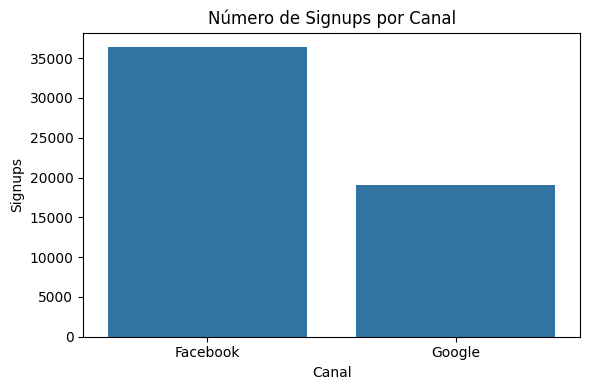

In [22]:
#Signups por canal

# Conteo de signups por canal
signups_by_channel = signups_clean['channel'].value_counts()

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=signups_by_channel.index, y=signups_by_channel.values)
plt.title('Número de Signups por Canal')
plt.ylabel('Signups')
plt.xlabel('Canal')
plt.tight_layout()
plt.show()


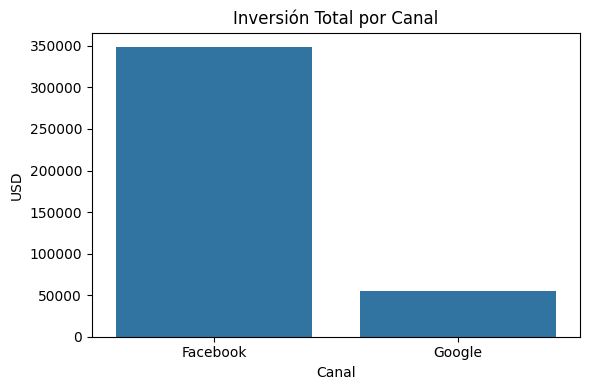

In [23]:
#Inversión total por canal

# Inversión total
facebook_total_spent = facebook_clean['Amount spent (USD)'].sum()
google_total_spent = google_clean['Cost'].sum()

# DataFrame para graficar
investment_df = pd.DataFrame({
    'Canal': ['Facebook', 'Google'],
    'Inversión Total (USD)': [facebook_total_spent, google_total_spent]
})

# Visualización
plt.figure(figsize=(6,4))
sns.barplot(data=investment_df, x='Canal', y='Inversión Total (USD)')
plt.title('Inversión Total por Canal')
plt.ylabel('USD')
plt.xlabel('Canal')
plt.tight_layout()
plt.show()


In [24]:
#Cálculo de métricas clave por canal

# Signups por canal
signups_facebook = signups_clean[signups_clean['channel'] == 'Facebook'].shape[0]
signups_google = signups_clean[signups_clean['channel'] == 'Google'].shape[0]

# Clicks e Impresiones totales
clicks_facebook = facebook_clean['Link clicks'].sum()
impr_facebook = facebook_clean['Impressions'].sum()

clicks_google = google_clean['Clicks'].sum()
impr_google = google_clean['Impr.'].sum()

# KPIs
metrics_df = pd.DataFrame({
    'Canal': ['Facebook', 'Google'],
    'Signups': [signups_facebook, signups_google],
    'Inversión': [facebook_total_spent, google_total_spent],
    'Clicks': [clicks_facebook, clicks_google],
    'Impresiones': [impr_facebook, impr_google]
})

metrics_df['CPA'] = metrics_df['Inversión'] / metrics_df['Signups']
metrics_df['CPC'] = metrics_df['Inversión'] / metrics_df['Clicks']
metrics_df['CTR'] = metrics_df['Clicks'] / metrics_df['Impresiones']

# Mostrar métricas redondeadas
metrics_df = metrics_df.round(3)
metrics_df


,Canal,Signups,Inversión,Clicks,Impresiones,CPA,CPC,CTR
0,Facebook,36367,348268.64,812954.0,105990422.0,9.577,0.428,0.008
1,Google,19065,54852.63,153523.0,14330792.0,2.877,0.357,0.011


Interpretación de Resultados del EDA
1. Signups por Canal
Facebook generó 36,367 registros, mientras que Google generó 19,065.

A primera vista, Facebook parece ser el canal dominante en volumen de adquisición (casi el doble) Facebook tiene más volumen, esto no implica necesariamente mayor eficiencia sin considerar el costo.

2. Inversión Total por Canal
Facebook recibió una inversión total de $348,268.64 USD, mientras que Google solo $54,852.63 USD.

Facebook acaparó alrededor del 86% del presupuesto, lo cual genera una asimetría importante en la asignación de inversión, esta desproporción nos sugiere que el rendimiento debe analizarse en términos relativos, no absolutos.

Mis Comentarios:

Google es mucho más eficiente: su CPA es 70% más bajo que Facebook.

Google también tiene menor costo por clic y mejor tasa de clics.

Facebook tiene el volumen, pero Google convierte más barato y mejor.



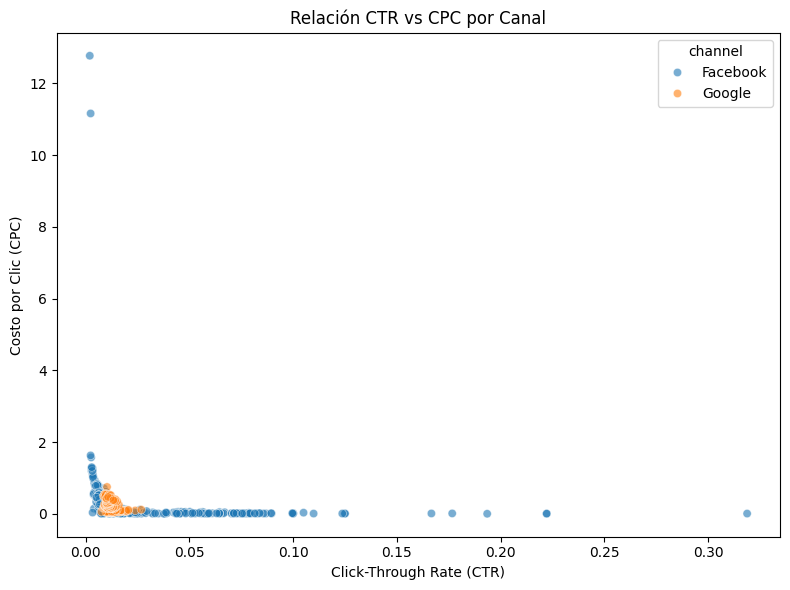

In [29]:
#CTR vs CPC

# Agregar canal a ambas bases
facebook_clean['channel'] = 'Facebook'
google_clean['channel'] = 'Google'
google_clean.rename(columns={'Impr.': 'Impressions', 'Clicks': 'Link clicks', 'Cost': 'Amount spent (USD)'}, inplace=True)

# Unir y calcular métricas por campaña
ads = pd.concat([facebook_clean, google_clean], ignore_index=True)
ads['CTR'] = ads['Link clicks'] / ads['Impressions']
ads['CPC'] = ads['Amount spent (USD)'] / ads['Link clicks']

# Gráfico
plt.figure(figsize=(8,6))
sns.scatterplot(data=ads, x='CTR', y='CPC', hue='channel', alpha=0.6)
plt.title('Relación CTR vs CPC por Canal')
plt.xlabel('Click-Through Rate (CTR)')
plt.ylabel('Costo por Clic (CPC)')
plt.tight_layout()
plt.show()


El gráfico de dispersión que relaciona el CTR (Click Through Rate) con el CPC (Costo por Clic) por canal ofrece una perspectiva visual del rendimiento de cada campaña en Facebook y Google.

Se observa que Google presenta una mayor consistencia en sus campañas, con una distribución más concentrada en valores de CTR entre 1% y 2.5% y CPCs bajos, lo que indica una mayor eficiencia en la conversión de impresiones en clics a un costo controlado.

Facebook muestra una mayor dispersión, con campañas que van desde rendimientos muy buenos (CTR alto y CPC bajo) hasta campañas ineficientes que combinan CTR extremadamente bajo con costos elevados por clic, algunas incluso por encima de los $10 USD.

Esta dispersión sugiere oportunidades claras de optimización dentro de Facebook, ya que existen campañas que generan clics a costos razonables y otras que representan un gasto sin retorno proporcional.

**Sección 4: Modelo o Estimación Predictiva**

Objetivo: Responder a la pregunta clave:

¿En cuál canal deberíamos invertir los próximos $10,000 USD si queremos maximizar los signups?

In [32]:
# CPA promedio por canal (ya calculado previamente)
cpa_facebook = metrics_df[metrics_df['Canal'] == 'Facebook']['CPA'].values[0]
cpa_google = metrics_df[metrics_df['Canal'] == 'Google']['CPA'].values[0]

# Estimación de signups adicionales con +$10,000
additional_budget = 10000

facebook_extra_signups = additional_budget / cpa_facebook
google_extra_signups = additional_budget / cpa_google

print(f"Signups adicionales estimados con $10,000 en Facebook: {facebook_extra_signups:.0f}")
print(f"Signups adicionales estimados con $10,000 en Google: {google_extra_signups:.0f}")


Signups adicionales estimados con $10,000 en Facebook: 1044
Signups adicionales estimados con $10,000 en Google: 3476


In [34]:
#Analisis de Campañas Facebook y Google

#renombrar:
google_clean.rename(columns={
    'Impr.': 'Impressions',
    'Clicks': 'Link clicks',
    'Cost': 'Amount spent (USD)'
}, inplace=True)

google_clean['channel'] = 'Google'
facebook_clean['channel'] = 'Facebook'

# Unir ambas fuentes
ads_combined = pd.concat([facebook_clean, google_clean], ignore_index=True)


In [35]:
ads_combined['Campaign'] = ads_combined['Campaign name'].combine_first(ads_combined['Campaign'])

# Calcular CTR y CPC
ads_combined['CTR'] = ads_combined['Link clicks'] / ads_combined['Impressions']
ads_combined['CPC'] = ads_combined['Amount spent (USD)'] / ads_combined['Link clicks']


In [36]:
#limpiar valores

# Filtrar campañas con datos válidos
ads_valid = ads_combined[
    (ads_combined['Link clicks'] > 0) &
    (ads_combined['Impressions'] > 0) &
    (ads_combined['Amount spent (USD)'] > 0)
].copy()


In [37]:
#Clasificar campañas

# Umbrales definidos
cpc_threshold = 1.00      # campañas caras
ctr_threshold = 0.01      # campañas con poco engagement

def clasificar(row):
    if row['CPC'] > cpc_threshold and row['CTR'] < ctr_threshold:
        return 'Pausar'
    elif row['CPC'] <= cpc_threshold and row['CTR'] >= ctr_threshold:
        return 'Escalar'
    else:
        return 'Revisar'

ads_valid['recomendacion'] = ads_valid.apply(clasificar, axis=1)


In [45]:
#Campañas

# Campañas a pausar
pausar = ads_valid[ads_valid['recomendacion'] == 'Pausar'][['Campaign', 'channel', 'CPC', 'CTR']]
print("Campañas a Pausar:")
display(pausar.sort_values(by='CPC', ascending=False).head(10))

# Campañas a escalar
escalar = ads_valid[ads_valid['recomendacion'] == 'Escalar'][['Campaign', 'channel', 'CPC', 'CTR']]
print("Campañas a Escalar:")
display(escalar.sort_values(by='CTR', ascending=False).head(10))


Campañas a Pausar:


,Campaign,channel,CPC,CTR
79,Omneky AAR - IOS<14 - Completed Registrations,Facebook,12.768000,0.001994
81,Omneky AAR - IOS<14 - Completed Registrations,Facebook,11.160000,0.002407
137,Omneky AAR - IOS<14 - Completed Registrations,Facebook,1.632615,0.002389
99,Omneky AAR - IOS<14 - Completed Registrations,Facebook,1.576214,0.002667
131,Omneky AAR - IOS<14 - Completed Registrations,Facebook,1.304291,0.002919
107,Omneky AAR - IOS<14 - Completed Registrations,Facebook,1.271393,0.003306
122,Omneky AAR - IOS<14 - Completed Registrations,Facebook,1.270558,0.002891
101,Omneky AAR - IOS<14 - Completed Registrations,Facebook,1.265556,0.003343
109,Omneky AAR - IOS<14 - Completed Registrations,Facebook,1.223731,0.003421
111,Omneky AAR - IOS<14 - Completed Registrations,Facebook,1.213359,0.003329


Campañas a Escalar:


,Campaign,channel,CPC,CTR
267,SteveMaddenTraffic_Propecting_MX_Omneky,Facebook,0.011818,0.318841
427,SteveMaddenTraffic_Propecting_MX_Omneky,Facebook,0.010000,0.222222
386,SteveMaddenTraffic_Propecting_MX_Omneky,Facebook,0.010000,0.222222
361,SteveMaddenTraffic_Propecting_MX_Omneky,Facebook,0.006667,0.193548
264,SteveMaddenTraffic_Propecting_MX_Omneky,Facebook,0.016170,0.176692
397,SteveMaddenTraffic_Propecting_MX_Omneky,Facebook,0.015000,0.166667
319,SteveMaddenTraffic_Propecting_MX_Omneky,Facebook,0.015714,0.125000
402,SteveMaddenTraffic_Propecting_MX_Omneky,Facebook,0.010000,0.125000
425,SteveMaddenTraffic_Propecting_MX_Omneky,Facebook,0.012500,0.123711
318,SteveMaddenTraffic_Propecting_MX_Omneky,Facebook,0.012000,0.109890


In [39]:
# Optmización de referidos
ltv = 6.14

# Grupo tratado (rewards_v1)
treated_data = {
    'invites': 41612,
    'converters': 9437,
    'reward_cash_consumed': 15104,
    'fee_discounted': 1297.23
}

# Grupo control
control_data = {
    'invites': 33976,
    'converters': 6968,
    'reward_cash_consumed': 0,
    'fee_discounted': 0  # Asumimos sin costo directo
}

# Función para calcular KPIs
def calculate_metrics(data, ltv):
    conversion_rate = data['converters'] / data['invites']
    total_cost = data['reward_cash_consumed'] + data['fee_discounted']
    cac = total_cost / data['converters']
    profit = (data['converters'] * ltv) - total_cost
    return {
        'conversion_rate': conversion_rate,
        'cac': cac,
        'profit': profit
    }

# Calcular para ambos grupos
treated_metrics = calculate_metrics(treated_data, ltv)
control_metrics = calculate_metrics(control_data, ltv)

# Mostrar resultados
import pandas as pd

results = pd.DataFrame({
    'Grupo': ['Treated (rewards_v1)', 'Control'],
    'Tasa de Conversión': [treated_metrics['conversion_rate'], control_metrics['conversion_rate']],
    'CAC (USD)': [treated_metrics['cac'], control_metrics['cac']],
    'Ganancia Estimada (USD)': [treated_metrics['profit'], control_metrics['profit']]
})

results.round(2)


,Grupo,Tasa de Conversión,CAC (USD),Ganancia Estimada (USD)
0,Treated (rewards_v1),0.23,1.74,41541.95
1,Control,0.21,0.00,42783.52


**Sección 5: Ejercicio de simulación de campañas**

Simular el comportamiento esperado de cada conjunto de anuncios (Ad Set Name) en Facebook y de cada campaña en Google, para:

Proyectar resultados bajo distintos escenarios de inversión.

Identificar qué campañas escalarían mejor con más presupuesto.

Estimar el punto en el que el CPA deja de ser rentable.


In [40]:
#Facebook

# Supuesto: tasa de conversión histórica (ej. 1.5%)
conversion_rate = 0.015
simulated_budgets = [100, 500, 1000, 2000]

# Obtener CPC histórico por Ad Set Name
fb_sim = facebook_clean.copy()
fb_sim = fb_sim[fb_sim['Link clicks'] > 0]
fb_sim['CPC'] = fb_sim['Amount spent (USD)'] / fb_sim['Link clicks']
fb_cpc = fb_sim.groupby('Ad Set Name')['CPC'].mean().reset_index()

# Simular escenarios
fb_results = []

for _, row in fb_cpc.iterrows():
    ad_set = row['Ad Set Name']
    cpc = row['CPC']
    for budget in simulated_budgets:
        clicks = budget / cpc
        signups = clicks * conversion_rate
        cpa = budget / signups if signups > 0 else None
        fb_results.append({
            'Ad Set Name': ad_set,
            'Budget': budget,
            'Clicks Est.': clicks,
            'Signups Est.': signups,
            'CPA Est.': cpa
        })

fb_sim_df = pd.DataFrame(fb_results)
fb_sim_df = fb_sim_df.round(2)



In [41]:
#Google

# Supuesto: tasa de conversión histórica (ej. 1.5%)
conversion_rate = 0.015
google_sim = google_clean.copy()
google_sim['CPC'] = google_sim['Amount spent (USD)'] / google_sim['Link clicks']
google_cpc = google_sim.groupby('Campaign')['CPC'].mean().reset_index()

# Simular escenarios
google_results = []

for _, row in google_cpc.iterrows():
    campaign = row['Campaign']
    cpc = row['CPC']
    for budget in simulated_budgets:
        clicks = budget / cpc
        signups = clicks * conversion_rate
        cpa = budget / signups if signups > 0 else None
        google_results.append({
            'Campaign': campaign,
            'Budget': budget,
            'Clicks Est.': clicks,
            'Signups Est.': signups,
            'CPA Est.': cpa
        })

google_sim_df = pd.DataFrame(google_results)
google_sim_df = google_sim_df.round(2)


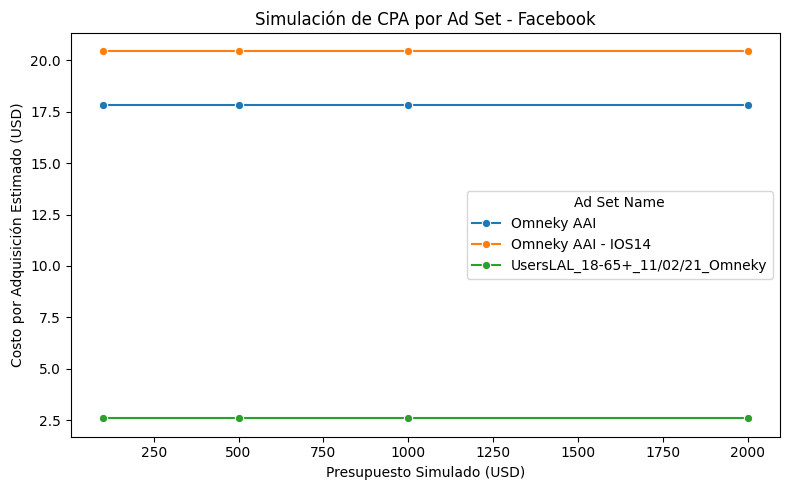

In [42]:
#Facebook – Gráfica CPA vs Presupuesto por Ad Set

# Seleccionar top 3 Ad Sets con mejor CPA al mayor presupuesto
top_fb_sets = (
    fb_sim_df[fb_sim_df['Budget'] == 2000]
    .sort_values(by='CPA Est.')
    .head(3)['Ad Set Name']
)

# Filtrar simulaciones solo para esos Ad Sets
fb_plot_df = fb_sim_df[fb_sim_df['Ad Set Name'].isin(top_fb_sets)]

# Graficar
plt.figure(figsize=(8, 5))
sns.lineplot(data=fb_plot_df, x='Budget', y='CPA Est.', hue='Ad Set Name', marker='o')
plt.title('Simulación de CPA por Ad Set - Facebook')
plt.ylabel('Costo por Adquisición Estimado (USD)')
plt.xlabel('Presupuesto Simulado (USD)')
plt.tight_layout()
plt.show()



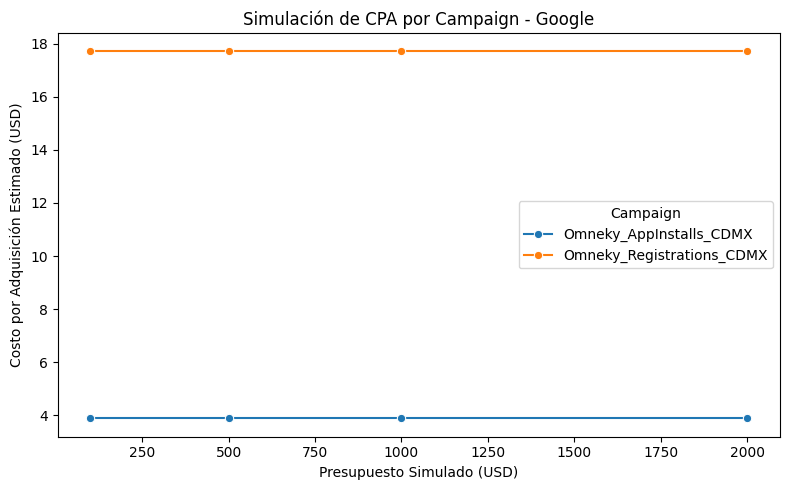

In [43]:
#Google – Gráfica CPA vs Presupuesto por Campaign

# Seleccionar top 3 campañas con mejor CPA al mayor presupuesto
top_google_camps = (
    google_sim_df[google_sim_df['Budget'] == 2000]
    .sort_values(by='CPA Est.')
    .head(3)['Campaign']
)

# Filtrar simulaciones solo para esas campañas
google_plot_df = google_sim_df[google_sim_df['Campaign'].isin(top_google_camps)]

# Graficar
plt.figure(figsize=(8, 5))
sns.lineplot(data=google_plot_df, x='Budget', y='CPA Est.', hue='Campaign', marker='o')
plt.title('Simulación de CPA por Campaign - Google')
plt.ylabel('Costo por Adquisición Estimado (USD)')
plt.xlabel('Presupuesto Simulado (USD)')
plt.tight_layout()
plt.show()


**Interpretación**

Como ejercicio adicional, se realizó una simulación de inversión incremental en campañas de Facebook y Google con el objetivo de identificar qué unidades escalan de manera eficiente sin comprometer su rendimiento. Para Facebook, se analizó el comportamiento del CPA por conjunto de anuncios (Ad Set Name), y en Google, por campaña (Campaign), simulando presupuestos de 100, 500, 1000 y $2000.

En Facebook, el conjunto de anuncios "UsersLAL_18-65+_11/02/21_Omneky" demostró ser altamente eficiente, manteniendo un CPA constante cercano a los 2.50 USD, lo que sugiere que puede escalar sin pérdida de rendimiento. En contraste, los conjuntos "Omneky AAI" y "Omneky AAI - IOS14" mantuvieron un CPA elevado (entre 18 y 20 USD) sin mejorar con el aumento de presupuesto, indicando que no son campañas viables para escalar en su estado actual.

En el caso de Google, la campaña "Omneky_AppInstalls_CDMX" mostró un CPA bajo y estable, alrededor de 3.90 USD, siendo una clara candidata para escalar. Por otro lado, la campaña "Omneky_Registrations_CDMX" mantuvo un CPA alto de aproximadamente 17.80 USD en todos los escenarios, lo que indica que no está generando retornos proporcionales y requiere ajustes antes de justificar mayor inversión.

Estas simulaciones refuerzan la importancia de tomar decisiones de inversión con base en el comportamiento proyectado, y no solo en el rendimiento histórico. Escalar únicamente aquellas campañas con CPA estable o decreciente bajo mayor inversión permite optimizar el uso del presupuesto y maximizar la eficiencia del canal.
